# Apply Q-Learning to the Flappy Bird Gym

Code adapted from: https://towardsdatascience.com/q-learning-algorithm-from-explanation-to-implementation-cdbeda2ea187

In [178]:
import time
import flappy_bird_gym
import numpy as np
import matplotlib.pyplot as plt
env = flappy_bird_gym.make("FlappyBird-v0")

In [76]:
n_x = 170
n_y = 200
n_observations = n_x*n_y
n_actions = 2

In [79]:
def state_to_index(x, y):
    idx = np.round(x*100)*200 + np.round((y+1)*100)
    return int(idx)

In [236]:
Q_table = np.zeros((n_observations,n_actions))
print(Q_table)

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [237]:
env.reset()
obs = env.step(0)
state_to_index(*obs[0])

32884

In [238]:
#number of episode we will run
n_episodes = 10000

#maximum of iteration per episode
max_iter_episode = 10000

#initialize the exploration probability to 1
exploration_proba = 1

#exploartion decreasing decay for exponential decreasing
exploration_decreasing_decay = 0.001

# minimum of exploration proba
min_exploration_proba = 0.01

#discounted factor
gamma = 0.99

#learning rate
lr = 0.1

In [239]:
rewards_per_episode = list()

In [240]:
#we iterate over episodes
for e in range(n_episodes):
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    reward = {'score':0}
    
    for i in range(max_iter_episode):
        if reward['score'] == 0:
            action = 0
            # env.action_space.sample() for a random action # 0 = nothing, 1 = flap
            if current_state[0] < 0.2:
                if current_state[1] < -.05:
                    action = 1
            else:
                if current_state[1] < -0.03:
                    action = 1

            # Processing:
            current_state, _, done, reward = env.step(action)
        else:
            # we sample a float from a uniform distribution over 0 and 1
            # if the sampled flaot is less than the exploration proba
            #     the agent selects arandom action
            # else
            #     he exploits his knowledge using the bellman equation 

            if np.random.uniform(0,1) < exploration_proba:
                action = env.action_space.sample()
            else:
                current_line = Q_table[state_to_index(*current_state),:]
                if current_line[0] == current_line[1]:
                    action = env.action_space.sample()
                else:
                    action = np.argmax(current_line)

            # The environment runs the chosen action and returns
            # the next state, a reward and true if the epiosed is ended.
            next_state, _ , done, reward = env.step(action)

            # We update our Q-table using the Q-learning iteration
            Q_table[state_to_index(*current_state), action] = (1-lr) * Q_table[state_to_index(*current_state), action] +lr*(1 + gamma*max(Q_table[state_to_index(*next_state),:]))
            total_episode_reward += 1
            # If the episode is finished, we leave the for loop
            if done:
                break
            current_state = next_state
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    rewards_per_episode.append(total_episode_reward)

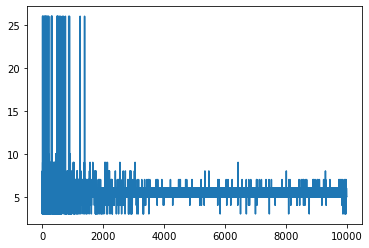

In [241]:
plt.plot(rewards_per_episode)

In [242]:
env.step(0)

(array([0.05902778, 0.08203125]), 1, True, {'score': 1})

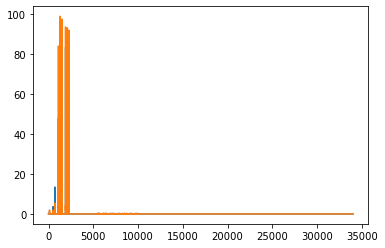

In [243]:
plt.plot(Q_table)

In [7]:
def run(fps=None):
    obs = env.reset()
    freq = 5
    counter = 0
    while True:
        counter += 1
        # Next action:
        # (feed the observation to your agent here)
        action = 0
        # env.action_space.sample() for a random action # 0 = nothing, 1 = flap
        if obs[0] < 0.2:
            if obs[1] < -.05:
                action = 1
        else:
            if obs[1] < -0.03:
                action = 1

        # Processing:
        obs_old = obs
        obs, reward, done, info = env.step(action)
        v_y = obs[1]-obs_old[1]
        #print(obs)

        # Rendering the game:
        # (remove this two lines during training)
        env.render()
        if fps is not None:
            time.sleep(1 / fps)  # FPS

        # Checking if the player is still alive
        if done:
            #env.close()
            return info


In [8]:
run(fps=60)

{'score': 80}

In [9]:
env.close()

In [111]:
l = [run()['score'] for i in range(1000)]

In [114]:
from tqdm.notebook import tqdm
from matplotlib import pyplot as plt

In [123]:
l2 = [run(fps=600)['score'] for i in tqdm(range(50))]

  0%|          | 0/50 [00:00<?, ?it/s]

In [117]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `n

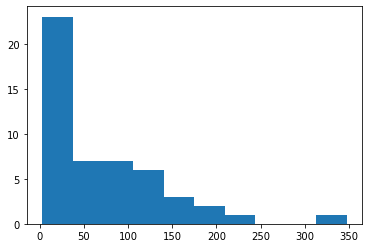

In [125]:
plt.hist(l2, bins=10);

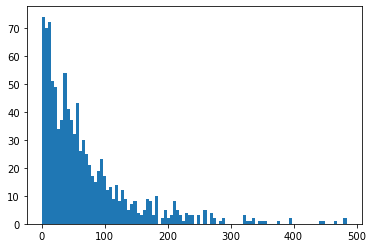

In [120]:
plt.hist(l, bins=100);